# Python for Data Science
## Introduction to Machine Learning: Regularization
### Patrick Chao


## Ridge Regression

In [3]:
# If you do not have ipywidgets:
# !pip install ipywidgets
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


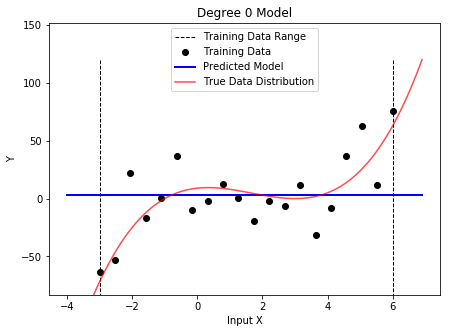

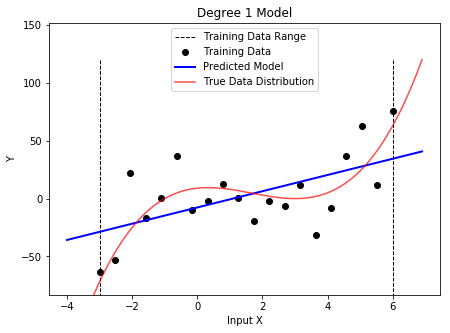

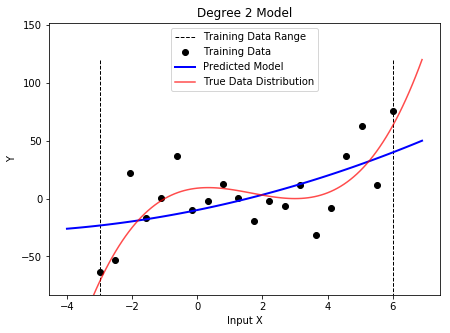

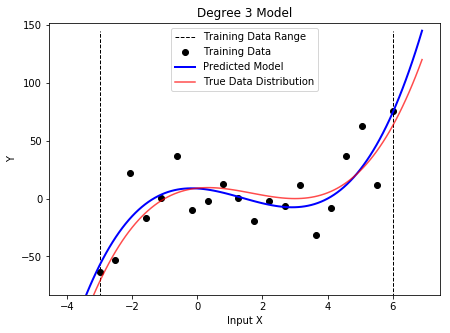

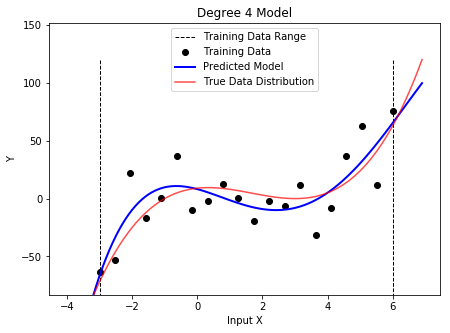

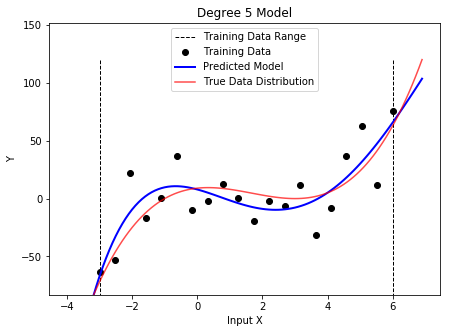

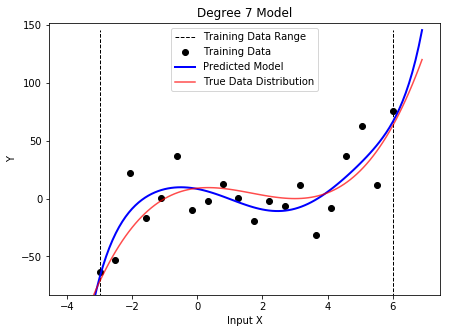

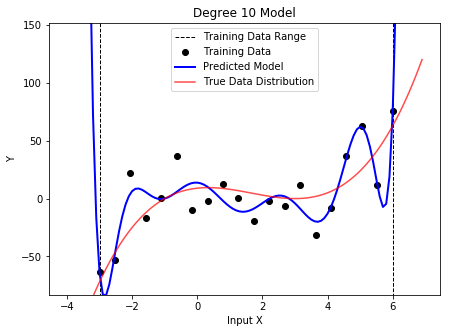

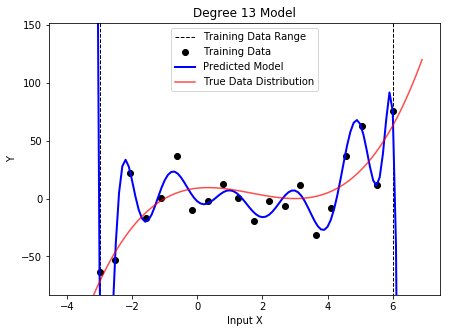

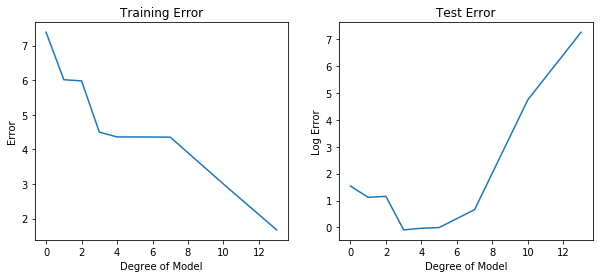

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

np.random.seed(5)
trainDataRange = np.array([-3,6])

#True model: y=x^3-5x^2+3+9
a = 1
b = -5
c = 3
d = 9

#Generate random training data within the trainDataRange
#Parameter for showing plots and number of samples
def generateTrainData(numSamples=20,showPlot=True):
    #Generate X data
    trainX = np.linspace(trainDataRange[0],trainDataRange[1],numSamples)
    trainX = np.sort(trainX)
    trueY = transform_x(trainX)
    #Add noise with variance 10
    noisyY = trueY+np.random.randn(numSamples)*20
    #Plot the data
    if showPlot:
        plt.plot(trainX,noisyY,'bo')
        plt.plot(trainDataRange, transform_x(trainDataRange), 'r-', lw=2)
        plt.ylabel("Noisy Y")
        plt.xlabel("Input X")
        plt.title("Clean X and Noisy Y from Linear Relationship")
        plt.ylim(ymin=min(noisyY-20),ymax=max(noisyY)*2)
        plt.show()
        plt.clf()
    return trainX,noisyY

def transform_x(inputX):
    return a*np.power(inputX,3)+b*np.power(inputX,2)+c*np.power(inputX,1)+d

#Validate the data on a larger range
#Default is -2 to 9
#Training region is denoted by dotted lines
def validate(model,trainX,noisyY,numSamples=500,dataRange=[-4,7],showPlot=True,coeffs={},fig_size=(7,5)):
    dataRange=np.arange(dataRange[0],dataRange[1],0.1)
    transformed_dataRange = transform_x(dataRange)
    #Generate x values from the data range
    inputX = np.random.random_sample((numSamples,))*(dataRange[-1]-dataRange[0])+dataRange[0]
    inputX = np.sort(inputX)
    trueY = transform_x(dataRange)
    predY=predict(model,dataRange)
    #Plot graphs
    if showPlot:
        #A bit of math to determine where to draw the dotted lines
        plt.figure(figsize = fig_size)
        #plt.axes().clear()
        coordX1 = [trainDataRange[0]]*2
        coordX2 = [trainDataRange[1]]*2
        minY = min(min(transformed_dataRange),min(predY))
        maxY = max(max(transformed_dataRange),max(predY))
        line1, = plt.plot(coordX1, [minY,maxY], 'k-', lw=1,linestyle="--", label="Training Data Range")
        plt.plot(coordX2, [minY,maxY], 'k-', lw=1,linestyle="--")
        #TrainX
        train, = plt.plot(trainX,noisyY,'ko', lw=2, label="Training Data")
        #Prediction
        pred, = plt.plot(dataRange,predY,'b-', lw=2, label="Predicted Model")
        #True Data
        trueData, = plt.plot(dataRange, transform_x(dataRange),'r-', lw=1.5, label="True Data Distribution",alpha=0.7)
        
        plt.ylabel("Y")
        plt.xlabel("Input X")
        plt.ylim(ymin=min(noisyY-20),ymax=max(noisyY)*2)
        title = "Degree " + str (len(model)-1)+ " Model"
        for i,key in enumerate(coeffs.keys()):
            title += " "+str(key)+"="+str(coeffs[key])
            if i<len(coeffs.keys())-1:
                title +=","
        plt.title(title)
        # Create a legend for the first line.
        legend = plt.legend(handles=[line1,train,pred,trueData])
        plt.show()
    return error(trueY,predY)

#Train the data
def model(trainX,trainY,degree=1):
    #Creates the vandermonde matrix https://en.wikipedia.org/wiki/Vandermonde_matrix
    powers=np.vander(trainX,degree+1)
    A=powers
    #Solves the normal equation
    model = np.linalg.solve(A.T@A,A.T@trainY)
    return model

#Predicts given x values based on a model
def predict(model,x):
    degree=len(model)-1
    powers=np.vander(x,degree+1)
    return powers@model

#Determines the error between true Y values and predicted
def error(trueY,predY):
    return np.linalg.norm((trueY-predY))/len(trueY)

#Generates graphs of different degree models
#Plots training error and test error
def overfittingDemo(degrees = [0,1,2,3,4,5,7,10,13]):
    trainX,trainY = generateTrainData(showPlot=False)
    trainError = []
    testError = []
    #Iterate over all model orders
    for deg in degrees:
        currModel = model(trainX,trainY,degree=deg)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,trainX,trainY,showPlot=True)
        trainError.append(currTrainErr)
        testError.append(currTestErr)
    
    #Plot the errors
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(degrees,trainError)
    plt.ylabel("Error")
    plt.xlabel("Degree of Model")
    plt.title("Training Error")
    
    
    plt.subplot(1,2,2)
    plt.plot(degrees,np.log(testError))
    plt.title("Test Error")
    plt.xlabel("Degree of Model")
    plt.ylabel("Log Error")
    plt.show()
    # Uncomment if you are curious about the actual error values
    # print("Training Errors:",trainError)
    # print("Test Errors:",testError)
    



overfittingDemo()


In [2]:
from ipywidgets import interactive
maxDegree=11
np.random.seed(13)
trainX,trainY = generateTrainData(showPlot=False)

def ridgeDemo(lambdaCoeffs,maxDegree=9):
    for lambdaCoeff in lambdaCoeffs:
        trainX,trainY = generateTrainData(showPlot=False)
        currModel = ridgeModel(trainX,trainY,lambdaCoeff=lambdaCoeff,degree=maxDegree)
        predTrainY = predict(currModel,trainX)
        currTrainErr = error(trainY,predTrainY)
        currTestErr = validate(currModel,trainX,trainY,showPlot=True,coeffs={'lambda':lambdaCoeff})
        print("Training Error: %.3f"%(currTrainErr))
        print("Test Error:  %.3f"%(currTestErr))
        coeffs = "Coefficients: " 
        coeffs+=', '.join(['%-2f' for i in currModel])%tuple(currModel)
        print(coeffs)
    
def ridgeModel(trainX,trainY,lambdaCoeff,degree=10):
    powers = np.vander(trainX,degree+1)
    A = powers
    regularizationMatrix = lambdaCoeff*np.eye((A.shape[1]))
    model = np.linalg.solve(A.T@A+regularizationMatrix,A.T@trainY)
    return model



def interactive_ridge(lambda_coefficient):
    currModel = ridgeModel(trainX,trainY,lambdaCoeff=lambda_coefficient,degree=maxDegree)
    currTestErr = validate(currModel,trainX,trainY,showPlot=True,coeffs={'lambda':lambda_coefficient},fig_size=(10,8))
    predTrainY = predict(currModel,trainX)
    currTrainErr = error(trainY,predTrainY)
    print("Training Error: %.3f"%(currTrainErr))
    print("Test Error:  %.3f"%(currTestErr))
    coeffs = "Coefficients: " 
    coeffs+=', '.join(['%-2f' for i in currModel])%tuple(currModel)
    print(coeffs)
    
interactive_plot = interactive(interactive_ridge, lambda_coefficient=(0.0,25.0, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '580px'
interactive_plot

interactive(children=(FloatSlider(value=12.5, description='lambda_coefficient', max=25.0), Output(layout=Layou…

The above demo applies ridge regression with various values of $\lambda$ from $0$ to $25$, for a $11$th degree polynomial. The curve is still not a great prediction, but the parameters are incredibly small. The coefficients outputted represent the coefficients for $x^{11}$, $x^{10}$,... to $x^0$. Overall, notice the trends in training error, test error, and how the coefficients change as $\lambda$ increase or decreases.

